In [360]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")


BikeCrashData = pd.read_csv('data/NCDOT_BikePedCrash.csv')

In [361]:
BikeCrashData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11266 entries, 0 to 11265
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           11266 non-null  float64
 1   Y           11266 non-null  float64
 2   OBJECTID    11266 non-null  int64  
 3   AmbulanceR  11266 non-null  object 
 4   BikeAge     11266 non-null  object 
 5   BikeAgeGrp  11266 non-null  object 
 6   BikeAlcDrg  11266 non-null  object 
 7   BikeAlcFlg  11266 non-null  object 
 8   BikeDir     11266 non-null  object 
 9   BikeInjury  11266 non-null  object 
 10  BikePos     11266 non-null  object 
 11  BikeRace    11266 non-null  object 
 12  BikeSex     11266 non-null  object 
 13  City        11266 non-null  object 
 14  County      11266 non-null  object 
 15  CrashAlcoh  11266 non-null  object 
 16  CrashDay    11266 non-null  object 
 17  CrashGrp    11266 non-null  object 
 18  CrashHour   11266 non-null  int64  
 19  CrashLoc    11266 non-nul

In [362]:
# Drop RdDefects column due to missing data
BikeCrashData.drop(columns=['RdDefects'], inplace=True)

In [363]:
BikeCrashData.columns


Index(['X', 'Y', 'OBJECTID', 'AmbulanceR', 'BikeAge', 'BikeAgeGrp',
       'BikeAlcDrg', 'BikeAlcFlg', 'BikeDir', 'BikeInjury', 'BikePos',
       'BikeRace', 'BikeSex', 'City', 'County', 'CrashAlcoh', 'CrashDay',
       'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth', 'CrashSevr',
       'CrashType', 'CrashYear', 'Developmen', 'DrvrAge', 'DrvrAgeGrp',
       'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex',
       'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 'NumBicsAin', 'NumBicsBin', 'NumBicsCin', 'NumBicsKil',
       'NumBicsNoi', 'NumBicsTot', 'NumBicsUin', 'NumLanes', 'NumUnits',
       'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdFeature',
       'RdSurface', 'Region', 'RuralUrban', 'SpeedLimit', 'TraffCntrl',
       'Weather', 'Workzone'],
      dtype='object')

In [364]:
BikeCrashData.head()


,X,Y,OBJECTID,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdConditio,RdConfig,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,-78.883896,36.039490,1,Yes,11,11-15,.,No,With Traffic,B: Suspected Minor Injury,...,Dry,"Two-Way, Divided, Unprotected Median",No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No
1,-78.782800,35.751118,2,Yes,20,20-24,.,No,Facing Traffic,C: Possible Injury,...,Dry,"Two-Way, Divided, Unprotected Median",Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
2,-80.697820,35.084732,3,Yes,37,30-39,.,No,Unknown,B: Suspected Minor Injury,...,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No
3,-80.479320,35.684400,4,Yes,30,30-39,.,No,With Traffic,C: Possible Injury,...,Dry,"Two-Way, Not Divided",Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Cloudy,No
4,-78.904450,34.999428,5,Yes,45,40-49,.,No,With Traffic,B: Suspected Minor Injury,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No


In [365]:
# Drop X, Y, ObjectID, Longitude and Latitude columns due to irrelevance for now
BikeCrashData.drop(columns=['X', 'Y', 'OBJECTID', 'Longitude', 'Latitude' ,'AmbulanceR'], inplace=True)

In [366]:
BikeCrashData.BikeAlcFlg.value_counts(), BikeCrashData.BikeAlcDrg.value_counts()

(BikeAlcFlg
 No         10115
 Yes          648
 Missing      270
 Unknown      233
 Name: count, dtype: int64,
 BikeAlcDrg
 No                                             7493
 .                                              2830
 Yes-Alcohol, impairment suspected               357
 Missing                                         253
 Unknown                                         233
 Yes-Alcohol, impairment detected                 57
 Yes-Alcohol and Drugs, impairment suspected      20
 Yes-Drugs, impairment suspected                  15
 Yes-Alcohol and Drugs, impairment detected        6
 Yes-Drugs, impairment detected                    2
 Name: count, dtype: int64)

In [367]:
# Insufficient data to make any meaningful analysis for Alchol and Drug use
BikeCrashData.drop(columns=['BikeAlcDrg', 'BikeAlcFlg'], inplace=True)

In [368]:
# Focusing on cyclists only, excpet on vechile type for potential link to severity
BikeCrashData.drop(columns=['DrvrAge','DrvrAgeGrp','DrvrAlcFlg','DrvrAlcDrg','DrvrInjury','DrvrRace', 'DrvrSex','CrashAlcoh', 'CrashType', 'HitRun'], inplace=True)

In [369]:
BikeCrashData.CrashDay.value_counts(), BikeCrashData.CrashMonth.value_counts(), BikeCrashData.CrashYear.value_counts()

(CrashDay
 Friday       1770
 Thursday     1701
 Wednesday    1697
 Tuesday      1695
 Monday       1624
 Saturday     1503
 Sunday       1276
 Name: count, dtype: int64,
 CrashMonth
 September    1248
 August       1239
 July         1204
 June         1154
 October      1125
 May          1123
 April         975
 November      837
 March         742
 December      590
 January       516
 February      513
 Name: count, dtype: int64,
 CrashYear
 2012    1020
 2008    1018
 2007    1001
 2017    1000
 2010     967
 2016     955
 2015     949
 2018     899
 2011     899
 2013     897
 2014     850
 2009     811
 Name: count, dtype: int64)

In [370]:
# Drop CrashDay, CrashMonth and CrashYear columns since crash date is not affecting the number of crashes
BikeCrashData.drop(columns=['CrashYear'], inplace=True)

In [371]:
BikeCrashData.Locality.value_counts(), BikeCrashData.RuralUrban.value_counts()   

(Locality
 Urban (>70% Developed)          8040
 Rural (<30% Developed)          1658
 Mixed (30% To 70% Developed)    1568
 Name: count, dtype: int64,
 RuralUrban
 Urban    8112
 Rural    3153
 .           1
 Name: count, dtype: int64)

In [372]:
# Dropping RuralUrban column since it is redundant with Locality
BikeCrashData.drop(columns=['RuralUrban'], inplace=True)

In [373]:
BikeCrashData.NumBicsNoi.value_counts(), BikeCrashData.NumBicsTot.value_counts()

(NumBicsNoi
 .    6668
 0    4116
 1     477
 2       5
 Name: count, dtype: int64,
 NumBicsTot
 .    6668
 1    4537
 2      56
 3       4
 4       1
 Name: count, dtype: int64)

In [374]:
# Doesn't seem to be any useful information in these columns
BikeCrashData.drop(columns=['NumBicsAin','NumBicsBin', 'NumBicsCin', 'NumBicsKil', 'NumBicsNoi', 'NumBicsTot','NumBicsUin', 'NumUnits'], inplace=True)

In [375]:
# Road conditions are important for cyclists to keep in mind
BikeCrashData.RdCharacte.value_counts(), BikeCrashData.RdClass.value_counts(), BikeCrashData.RdConfig.value_counts(), BikeCrashData.RdFeature.value_counts(), BikeCrashData.RdSurface.value_counts()

(RdCharacte
 Straight - Level        8523
 Straight - Grade        1525
 Straight - Hillcrest     396
 Curve - Level            319
 Curve - Grade            211
 Straight - Bottom        137
 Curve - Hillcrest         56
 Missing                   51
 Curve - Bottom            22
 Unknown                   20
 Other                      6
 Name: count, dtype: int64,
 RdClass
 Local Street              6767
 State Secondary Route     1742
 NC Route                   928
 US Route                   826
 Public Vehicular Area      810
 Private Road, Driveway      82
 missing                     53
 Interstate                  29
 Unknown                     26
 .                            3
 Name: count, dtype: int64,
 RdConfig
 Two-Way, Not Divided                         8452
 Two-Way, Divided, Unprotected Median         1798
 One-Way, Not Divided                          446
 Two-Way, Divided, Positive Median Barrier     436
 Unknown                                       134
 Name: c

In [376]:
BikeCrashData[['Region','SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone']]

,Region,SpeedLimit,TraffCntrl,Weather,Workzone
0,Piedmont,30 - 35 MPH,No Control Present,Clear,No
1,Piedmont,30 - 35 MPH,Stop And Go Signal,Clear,No
2,Piedmont,20 - 25 MPH,No Control Present,Cloudy,No
3,Piedmont,30 - 35 MPH,No Control Present,Cloudy,No
4,Coastal,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No
...,...,...,...,...,...
11261,Piedmont,30 - 35 MPH,Stop Sign,Clear,No
11262,Piedmont,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Clear,No
11263,Coastal,30 - 35 MPH,Stop And Go Signal,Clear,No
11264,Coastal,20 - 25 MPH,No Control Present,Clear,No


In [377]:
# Dropping where traffic control is Missing
BikeCrashData.drop(BikeCrashData[BikeCrashData.TraffCntrl == 'Missing'].index, inplace=True)

In [378]:
BikeCrashData.head()

,BikeAge,BikeAgeGrp,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashDay,...,RdClass,RdConditio,RdConfig,RdFeature,RdSurface,Region,SpeedLimit,TraffCntrl,Weather,Workzone
0,11,11-15,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,Male,Durham,Durham,Tuesday,...,Local Street,Dry,"Two-Way, Divided, Unprotected Median",No Special Feature,Smooth Asphalt,Piedmont,30 - 35 MPH,No Control Present,Clear,No
1,20,20-24,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Hispanic,Male,Cary,Wake,Friday,...,Local Street,Dry,"Two-Way, Divided, Unprotected Median",Four-Way Intersection,Smooth Asphalt,Piedmont,30 - 35 MPH,Stop And Go Signal,Clear,No
2,37,30-39,Unknown,B: Suspected Minor Injury,Non-Roadway,Black,Male,Stallings,Union,Monday,...,Public Vehicular Area,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,20 - 25 MPH,No Control Present,Cloudy,No
3,30,30-39,With Traffic,C: Possible Injury,Travel Lane,White,Male,Salisbury,Rowan,Friday,...,Local Street,Dry,"Two-Way, Not Divided",Four-Way Intersection,Smooth Asphalt,Piedmont,30 - 35 MPH,No Control Present,Cloudy,No
4,45,40-49,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,Male,Fayetteville,Cumberland,Friday,...,Local Street,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No


In [379]:
# Focusing on the general aspects of the crash, so dropping the location related columns
BikeCrashData.drop(columns=['City', 'County'], inplace=True)

In [380]:
BikeCrashData.columns

Index(['BikeAge', 'BikeAgeGrp', 'BikeDir', 'BikeInjury', 'BikePos', 'BikeRace',
       'BikeSex', 'CrashDay', 'CrashGrp', 'CrashHour', 'CrashLoc',
       'CrashMonth', 'CrashSevr', 'Developmen', 'DrvrVehTyp', 'LightCond',
       'Locality', 'NumLanes', 'RdCharacte', 'RdClass', 'RdConditio',
       'RdConfig', 'RdFeature', 'RdSurface', 'Region', 'SpeedLimit',
       'TraffCntrl', 'Weather', 'Workzone'],
      dtype='object')

In [381]:
# Developmen column seems redundant with Region
BikeCrashData.drop(columns=['Developmen'], inplace=True)

# Now we will look at the remaining columns

## The main focus is on crash severity and how the cyclists were affected given other conditions


In [382]:
BikeCrashData.BikeInjury.value_counts(), BikeCrashData.CrashSevr.value_counts()

(BikeInjury
 B: Suspected Minor Injury      4601
 C: Possible Injury             4270
 O: No Injury                   1090
 A: Suspected Serious Injury     572
 Unknown Injury                  332
 K: Killed                       248
 Name: count, dtype: int64,
 CrashSevr
 B: Suspected Minor Injury      4635
 C: Possible Injury             4300
 O: No Injury                   1267
 A: Suspected Serious Injury     584
 K: Killed                       257
 Unknown Injury                   70
 Name: count, dtype: int64)

In [383]:
# Paying attention to the severe crashes (Killed or Suspected Serious Injury)
# Focusing on the bike injury column to avoid redundancy
BikeCrashData.drop(columns=['CrashSevr'], inplace=True)
BikeCrashData.drop(BikeCrashData[BikeCrashData.BikeInjury == 'B: Suspected Minor Injury'].index, inplace=True)
BikeCrashData.drop(BikeCrashData[BikeCrashData.BikeInjury == 'C: Possible Injury'].index, inplace=True)
BikeCrashData.drop(BikeCrashData[BikeCrashData.BikeInjury == 'O: No Injury'].index, inplace=True)
BikeCrashData.drop(BikeCrashData[BikeCrashData.BikeInjury == 'Unknown Injury'].index, inplace=True)
BikeCrashData.BikeInjury.value_counts()

BikeInjury
A: Suspected Serious Injury    572
K: Killed                      248
Name: count, dtype: int64

In [384]:
BikeCrashData.head()

,BikeAge,BikeAgeGrp,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,CrashDay,CrashGrp,CrashHour,...,RdClass,RdConditio,RdConfig,RdFeature,RdSurface,Region,SpeedLimit,TraffCntrl,Weather,Workzone
6,51,50-59,With Traffic,A: Suspected Serious Injury,Travel Lane,Black,Male,Saturday,Motorist Overtaking Bicyclist,19,...,State Secondary Route,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Piedmont,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Cloudy,No
10,19,16-19,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Hispanic,Male,Saturday,Bicyclist Right Turn / Merge,21,...,State Secondary Route,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,30 - 35 MPH,No Control Present,Clear,No
16,10,6-10,Not Applicable,A: Suspected Serious Injury,Non-Roadway,White,Male,Saturday,Bicyclist Failed to Yield - Midblock,13,...,Public Vehicular Area,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,50 - 55 MPH,No Control Present,Clear,No
26,60,60-69,With Traffic,A: Suspected Serious Injury,Travel Lane,White,Female,Tuesday,Motorist Left Turn / Merge,16,...,State Secondary Route,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No
28,42,40-49,With Traffic,K: Killed,Bike Lane / Paved Shoulder,White,Male,Tuesday,Motorist Overtaking Bicyclist,8,...,Local Street,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,40 - 45 MPH,No Control Present,Clear,No


In [385]:
dum1=pd.get_dummies(BikeCrashData, columns=['BikeInjury'])*1
BikeCrashData['BikeInjury_K: Killed']=dum1['BikeInjury_K: Killed']


In [386]:
BikeCrashData.columns

Index(['BikeAge', 'BikeAgeGrp', 'BikeDir', 'BikeInjury', 'BikePos', 'BikeRace',
       'BikeSex', 'CrashDay', 'CrashGrp', 'CrashHour', 'CrashLoc',
       'CrashMonth', 'DrvrVehTyp', 'LightCond', 'Locality', 'NumLanes',
       'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdFeature',
       'RdSurface', 'Region', 'SpeedLimit', 'TraffCntrl', 'Weather',
       'Workzone', 'BikeInjury_K: Killed'],
      dtype='object')

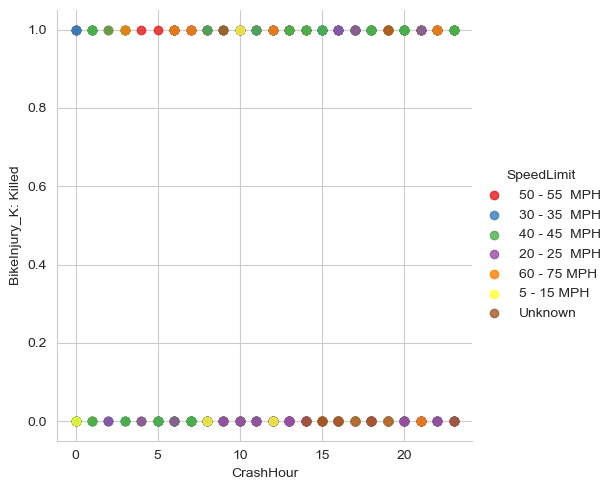

In [333]:
sns.lmplot(x='CrashHour', y='BikeInjury_K: Killed', data=BikeCrashData, fit_reg=False, hue='SpeedLimit', legend=True, palette='Set1')

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


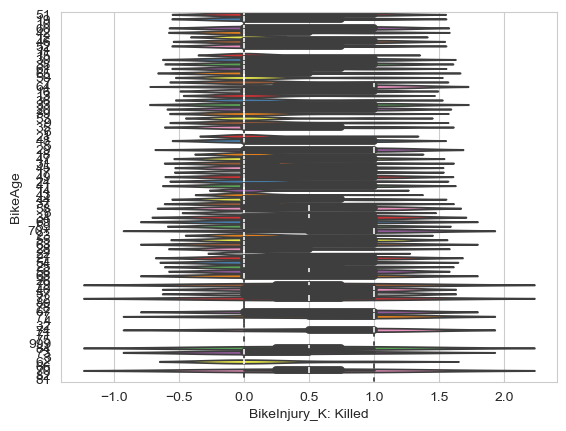

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


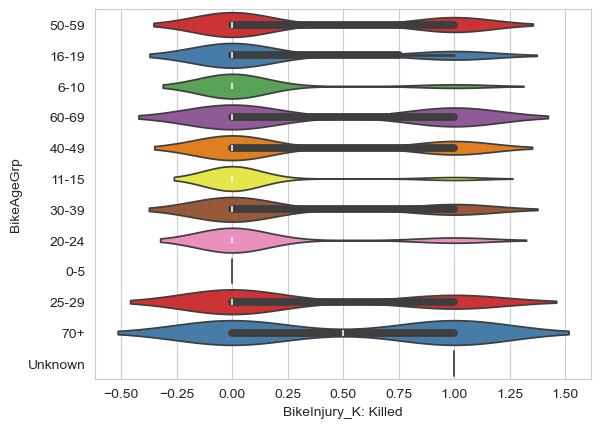

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


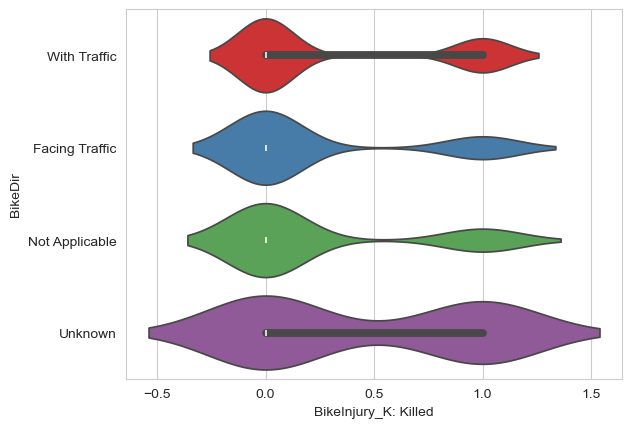

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


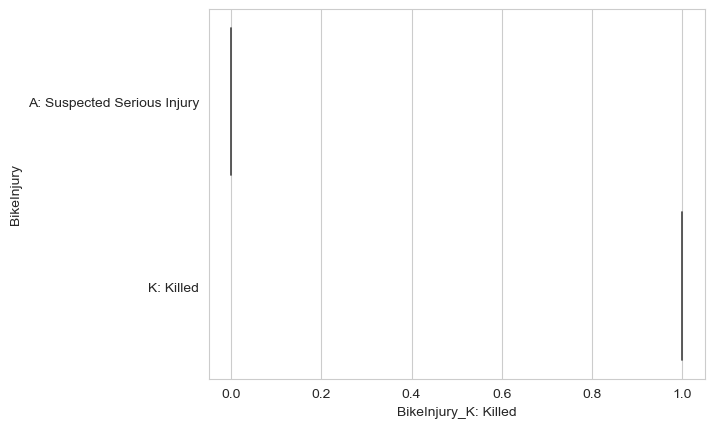

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


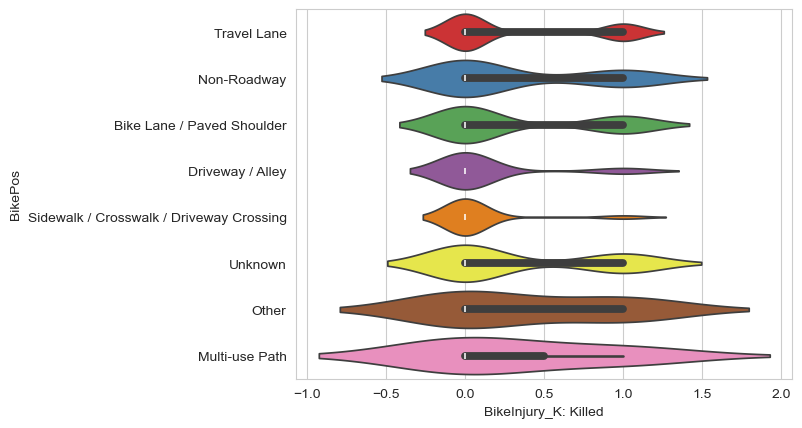

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


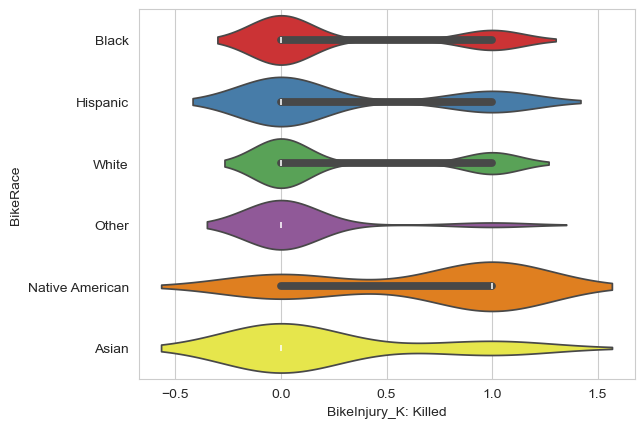

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


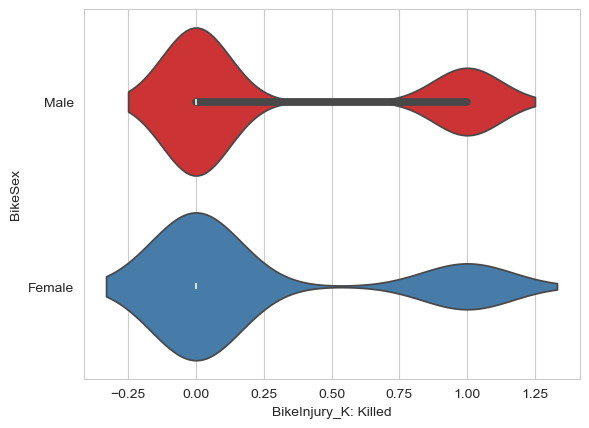

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


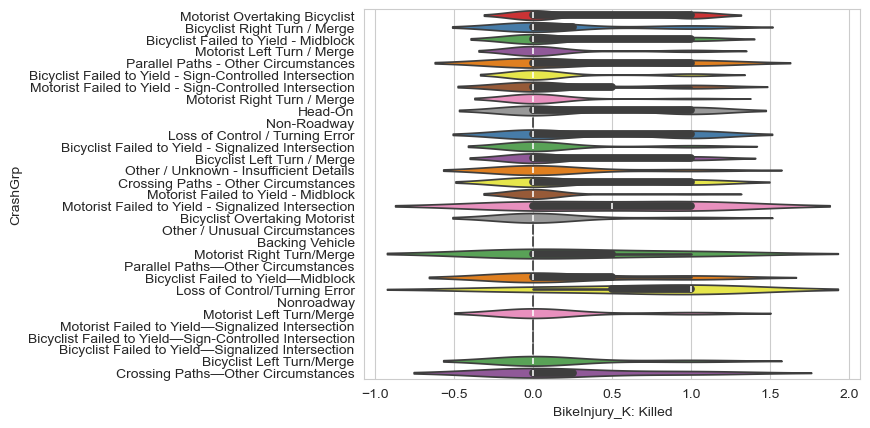

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


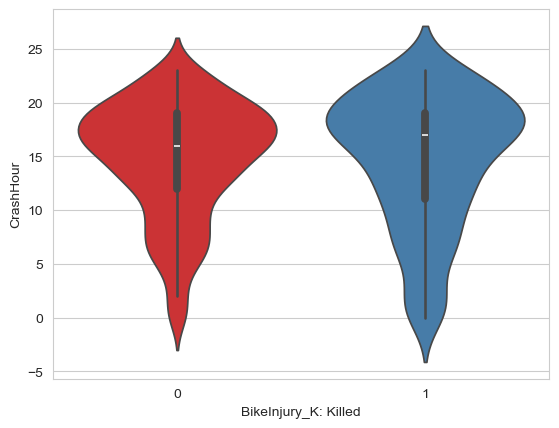

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


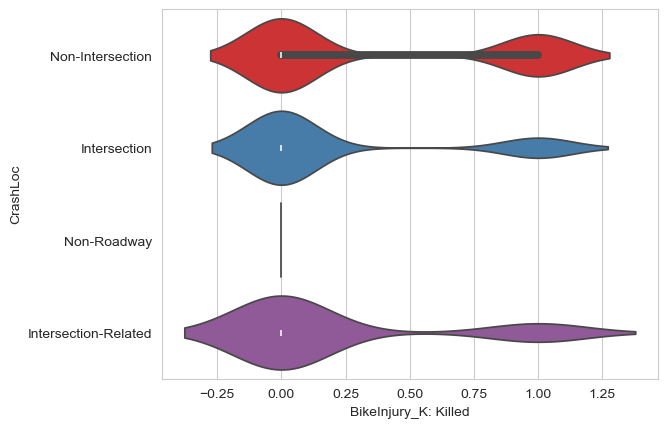

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


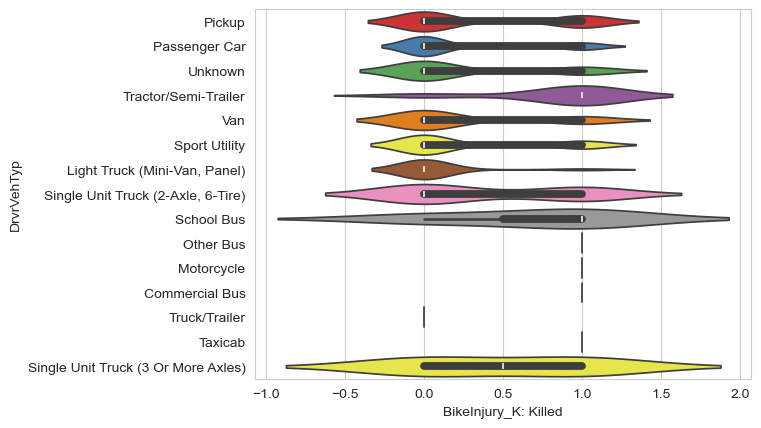

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


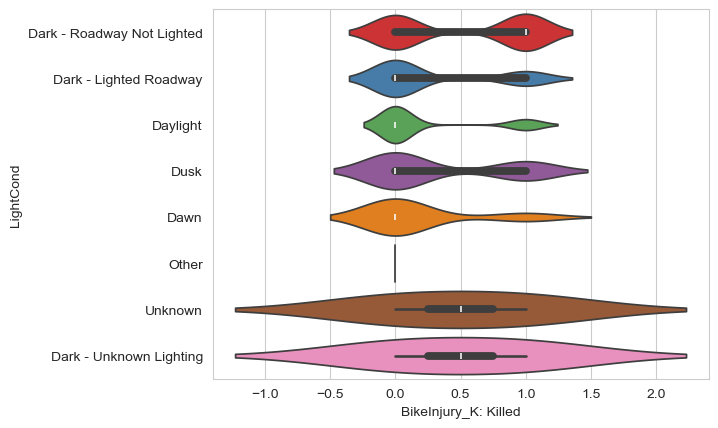

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


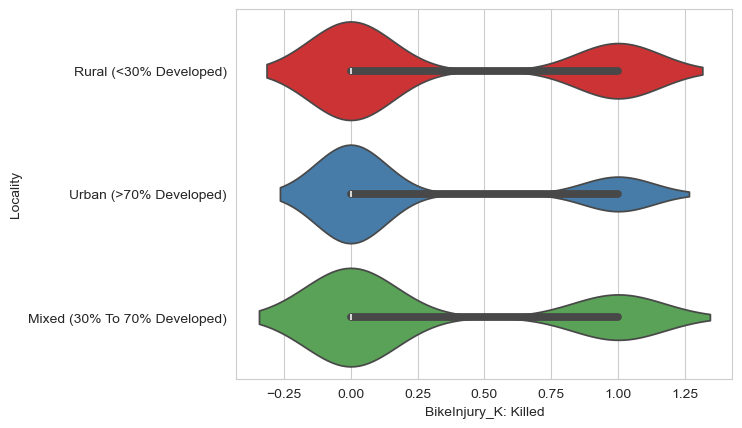

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


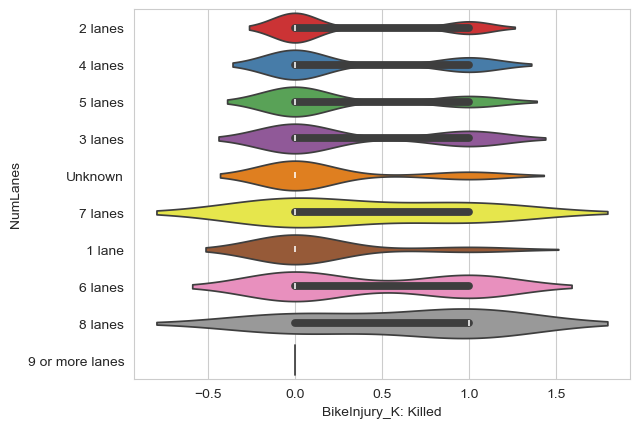

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


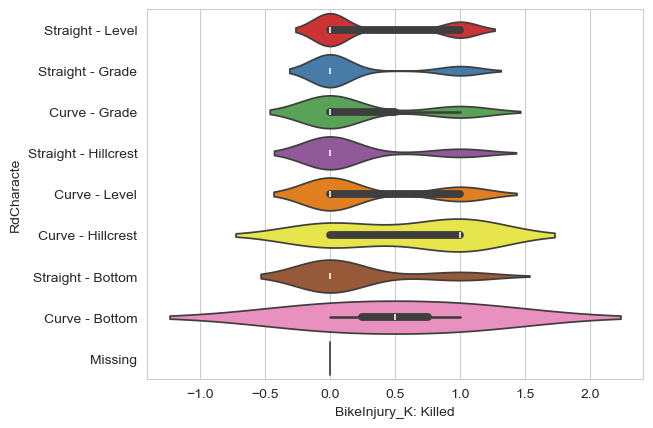

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


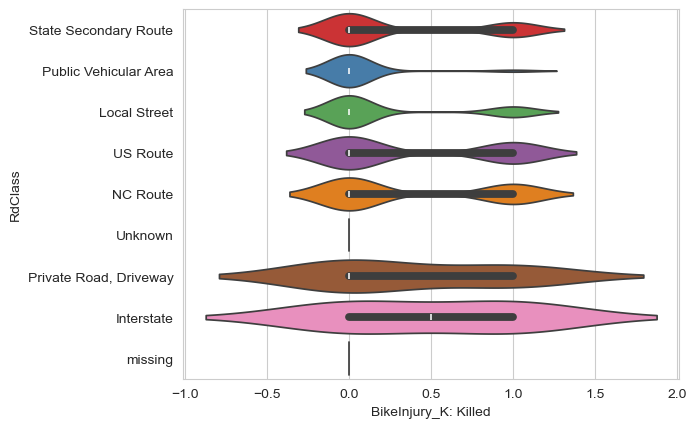

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


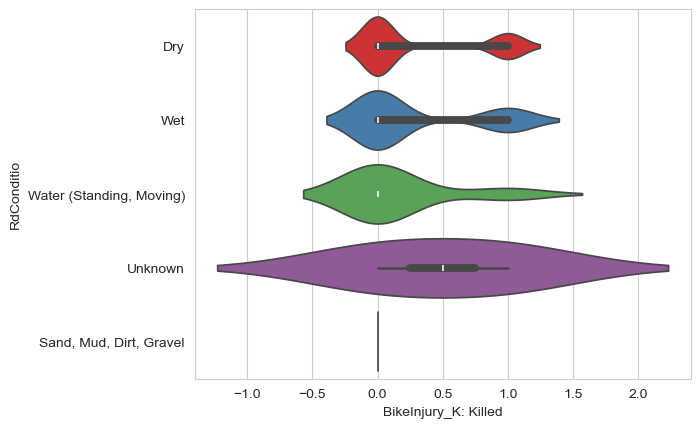

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


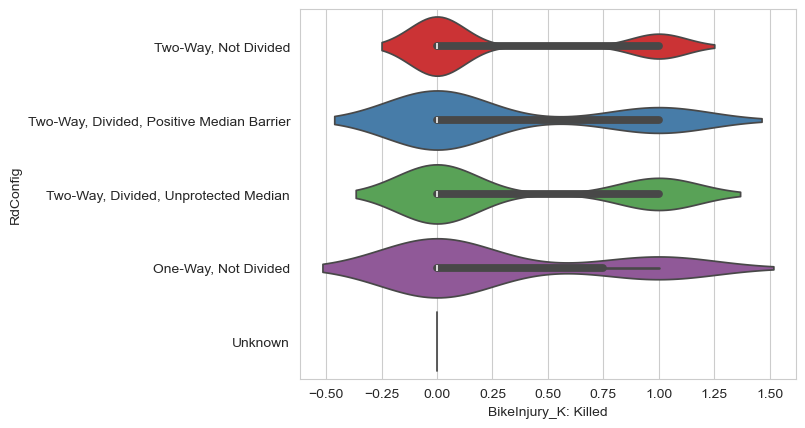

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


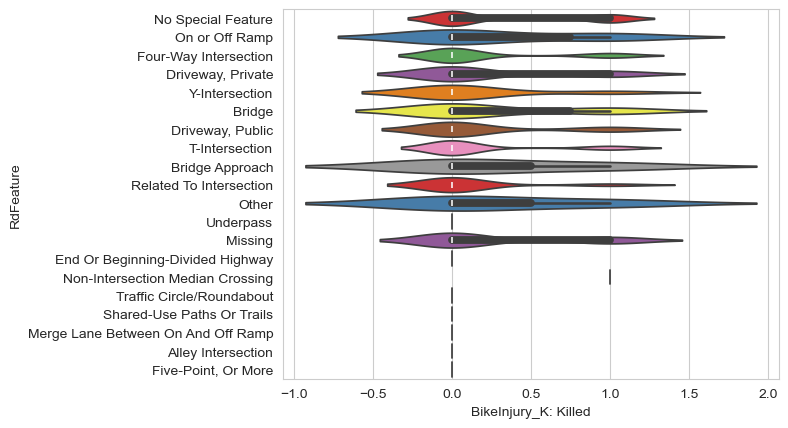

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


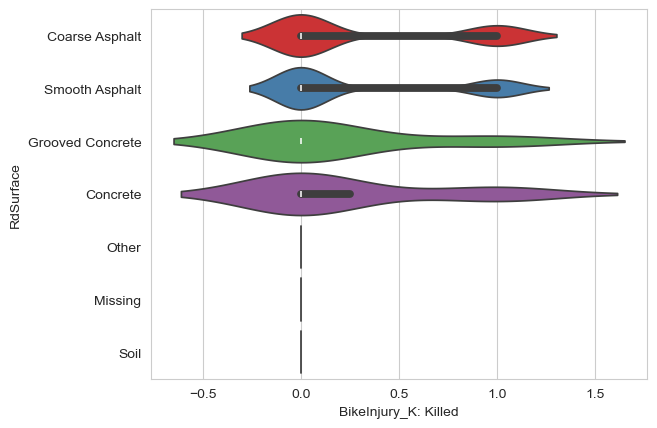

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


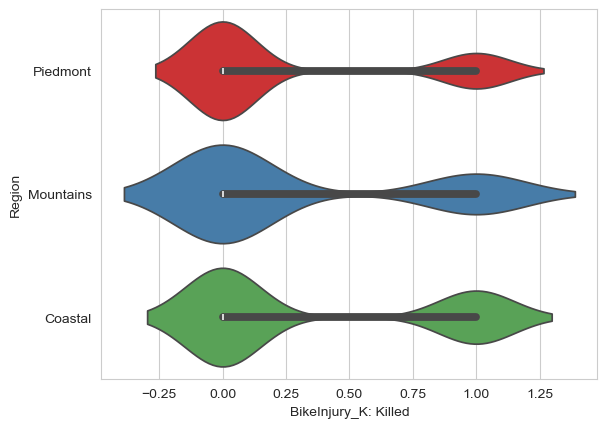

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


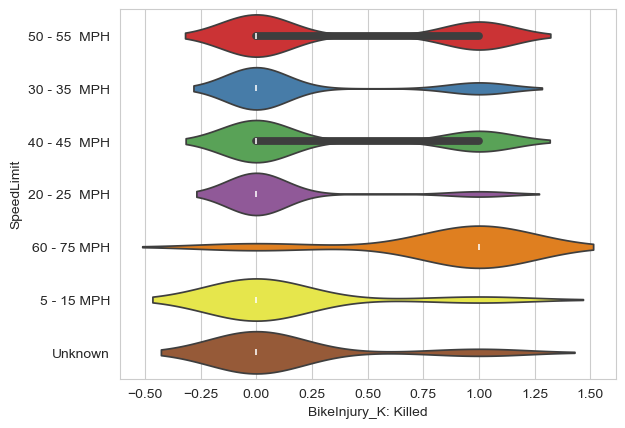

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


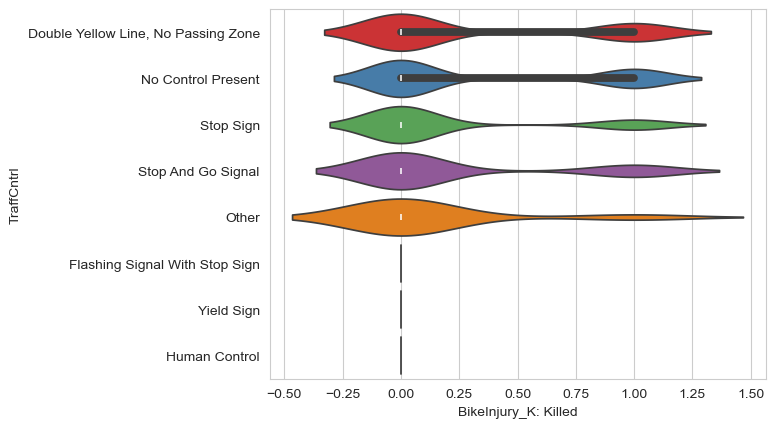

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


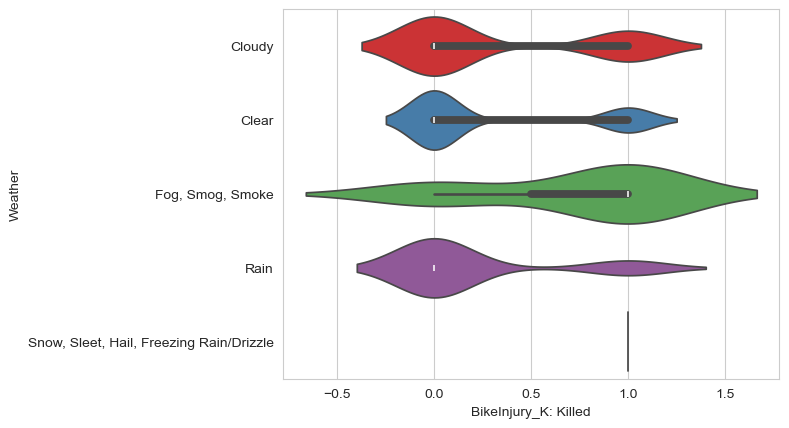

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


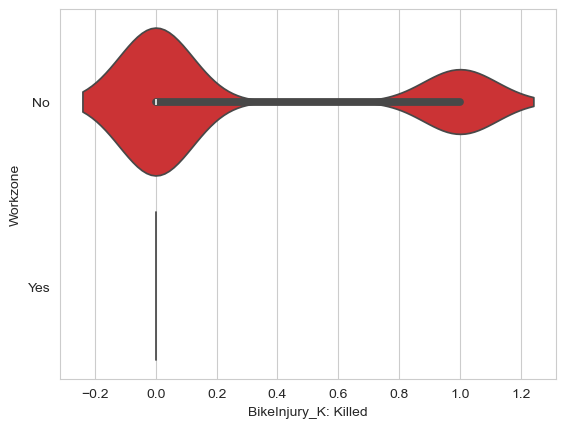

C:\Users\ayman\AppData\Local\Temp\ipykernel_35204\2731793670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')


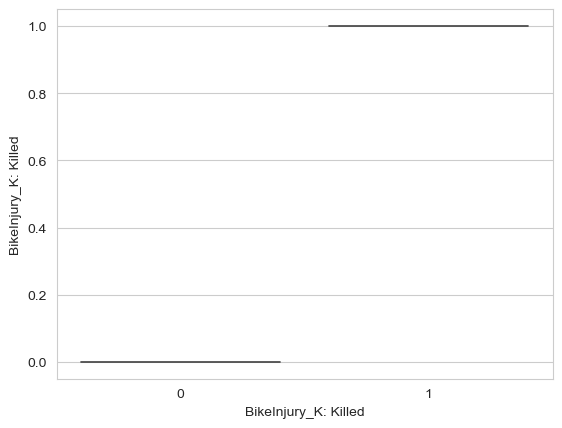

In [359]:
for ele in BikeCrashData.columns:
    sns.violinplot(x='BikeInjury_K: Killed', y=ele, data=BikeCrashData, palette='Set1')
    plt.show()